In [2]:
import os
import glob
import pickle
import sklearn
import spacy
import lime
import keras
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from keras_preprocessing.sequence import pad_sequences
from keras_preprocessing.text import Tokenizer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('sample/exp_train.csv')

df

,Unnamed: 0,Email,key,Nama Peserta,Project,MD,MI,MS,MC,LD,...,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77
0,1,atkamliaa@gmail.com,SUMMARY When was in college I was experienced ...,Atikah Amalia,Hiring Batch 1 2,7,3,2,6,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,deri45anggraini@gmail.com,PT_ Bank Negara Indonesia 20202021 Job descrip...,Deri Firma Anggraini,Hiring Batch 1 2,8,2,3,7,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,elisabethda1994@gmail.com,COMMITTEES Coordinator of the public relations...,Elisabeth Dwi Anggraeni,Hiring Batch 1 2,8,3,2,5,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,jordyrevindra@gmail.com,PT Pertamina RU IV Persero Cilacap Jawa Tengah...,Jordy Revindra Priana,Hiring Batch 1 2,5,4,3,7,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,nisakusuma20@gmail.com,EXPERIENCE PT Metranet PaDi UMKM Telkom Group ...,Nisa Kusuma Febri,Hiring Batch 1 2,4,3,5,7,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,7,adhibhawika@gmail.com,SENAT MAHASISWA UNIVERSITAS DIPONEGORO JAN 201...,Adhi Bhawika Prabhaswara,Hiring Batch 1 3,7,3,0,6,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,8,c.chusnulkotimah@gmail.com,Experienced and energetic Marketing Manager wi...,Chusnul Kotimah,Hiring Batch 1 3,5,0,4,4,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,9,devisarasaty@gmail.com,KERJAINPLIS Freelance Writer April 2021 Presen...,Devi Sarasaty,Hiring Batch 1 3,9,2,0,6,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,10,fkevinirwanto@gmail.com,October 2019 PT Angkasa Pura 1 Persero Human C...,Kevin Irwanto,Hiring Batch 1 3,8,1,3,5,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
def generalize(x):
    if x == 0:
        return 1
    elif x == 1:
        return 0
    elif x >= 2 and x < 4:
        return 0
    elif x >= 4 and x < 6:
        return 1
    elif x >= 6 and x < 8:
        return 2
    elif x >= 8 and x < 11:
        return 3
    elif x >= 11:
        return 7

df['MD'] = df.MD.apply(lambda x : generalize(x))

df

,Unnamed: 0,Email,key,Nama Peserta,Project,MD,MI,MS,MC,LD,...,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77
0,1,atkamliaa@gmail.com,SUMMARY When was in college I was experienced ...,Atikah Amalia,Hiring Batch 1 2,2,3,2,6,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,deri45anggraini@gmail.com,PT_ Bank Negara Indonesia 20202021 Job descrip...,Deri Firma Anggraini,Hiring Batch 1 2,3,2,3,7,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,elisabethda1994@gmail.com,COMMITTEES Coordinator of the public relations...,Elisabeth Dwi Anggraeni,Hiring Batch 1 2,3,3,2,5,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,jordyrevindra@gmail.com,PT Pertamina RU IV Persero Cilacap Jawa Tengah...,Jordy Revindra Priana,Hiring Batch 1 2,1,4,3,7,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,nisakusuma20@gmail.com,EXPERIENCE PT Metranet PaDi UMKM Telkom Group ...,Nisa Kusuma Febri,Hiring Batch 1 2,1,3,5,7,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,7,adhibhawika@gmail.com,SENAT MAHASISWA UNIVERSITAS DIPONEGORO JAN 201...,Adhi Bhawika Prabhaswara,Hiring Batch 1 3,2,3,0,6,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,8,c.chusnulkotimah@gmail.com,Experienced and energetic Marketing Manager wi...,Chusnul Kotimah,Hiring Batch 1 3,1,0,4,4,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,9,devisarasaty@gmail.com,KERJAINPLIS Freelance Writer April 2021 Presen...,Devi Sarasaty,Hiring Batch 1 3,3,2,0,6,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,10,fkevinirwanto@gmail.com,October 2019 PT Angkasa Pura 1 Persero Human C...,Kevin Irwanto,Hiring Batch 1 3,3,1,3,5,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df.loc[2, "key"]

'COMMITTEES Coordinator of the public relations division of ORASI 2019 Project leader for amendment to student activity unit regulation at Kema Unpad 2020 Commissioner at Prama Unpad 2019  '

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 79 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  9 non-null      int64  
 1   Email                       9 non-null      object 
 2   key                         9 non-null      object 
 3   Nama Peserta                9 non-null      object 
 4   Project                     9 non-null      object 
 5   MD                          9 non-null      int64  
 6   MI                          9 non-null      int64  
 7   MS                          9 non-null      int64  
 8   MC                          9 non-null      int64  
 9   LD                          9 non-null      int64  
 10  LI                          9 non-null      int64  
 11  LS                          9 non-null      int64  
 12  LC                          9 non-null      int64  
 13  CD                          9 non-null 

In [6]:
df.describe()

,Unnamed: 0,MD,MI,MS,MC,LD,LI,LS,LC,CD,...,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,5.444444,2.111111,2.333333,2.444444,5.888889,4.111111,6.222222,5.000000,4.000000,2.666667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,3.205897,0.927961,1.224745,1.666667,1.054093,1.536591,2.773886,0.707107,1.414214,3.082207,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,4.000000,4.000000,1.000000,-2.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,3.000000,1.000000,2.000000,2.000000,5.000000,4.000000,5.000000,5.000000,3.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,5.000000,2.000000,3.000000,3.000000,6.000000,4.000000,5.000000,5.000000,5.000000,3.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,8.000000,3.000000,3.000000,3.000000,7.000000,5.000000,7.000000,5.000000,5.000000,4.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,10.000000,3.000000,4.000000,5.000000,7.000000,6.000000,13.000000,6.000000,5.000000,7.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [116]:
df.MD.unique()

array([2, 3, 1, 0], dtype=int64)

In [111]:
ss = StandardScaler()

ss.fit(df[['MD']])

df['MD'] = ss.transform(df.loc[:, ["MD"]])
df

,Email,key,Nama Peserta,MD,MI,MS,MC,LD,LI,LS,...,KERJASAMA,KETERAMPILAN_INTERPERSONAL,LOGIKA_BERPIKIR,MOTIVASI_BERPRESTASI,ORIENTASI_HASIL,PENYELESAIAN_MASALAH,SISTEMATIKA_KERJA,pil_jabatan,prosen_kecocokan,hasil_rekomendasi
0,ariefwijayakusuma96@gmail.com,network administrator permanent address custom...,Arief Wijaya Kusuma,0.071167,3,2,8,5,5,6,...,2,2,4,3,3,4,3,standar,92%,Disarankan
1,atkamliaa@gmail.com,human capital trainer credit assistant marketi...,Atikah Amalia,0.071167,3,2,6,4,5,5,...,3,2,2,3,2,3,2,standar,79%,Dipertimbangkan
2,deri45anggraini@gmail.com,commissioner deputy head of public relations d...,Deri Firma Anggraini,1.186114,2,3,7,4,4,5,...,3,2,5,3,3,3,3,standar,95%,Disarankan
3,elisabethda1994@gmail.com,hrd staff hr human capital student,Elisabeth Dwi Anggraeni,1.186114,3,2,5,4,5,6,...,3,2,5,3,3,4,3,standar,95%,Disarankan
4,jordyrevindra@gmail.com,head division of public relations business pro...,Jordy Revindra Priana,-1.043780,4,3,7,5,5,5,...,3,3,2,2,2,3,3,standar,85%,Disarankan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,adzkiaaulia@gmail.com,secretary supporting services intern facilitat...,Aulia Adzkia Fauzi,0.071167,2,2,6,5,6,4,...,2,2,4,3,4,4,3,standar,92%,Disarankan
90,davidacroos@gmail.com,frontliner admin data entry operations manager...,David Pratama,1.186114,2,3,4,9,6,4,...,3,3,3,3,3,4,2,standar,95%,Disarankan
91,deapandhita@gmail.com,logistic administration staff secretary senior...,Regina Dea Pandhita Putri,0.071167,3,4,6,5,6,6,...,3,2,3,3,3,3,3,standar,95%,Disarankan
92,dhiaulfa.thufaila@gmail.com,human resources management financial manager p...,Dhiaulfa Thufaila,-1.043780,2,0,9,4,6,4,...,2,2,2,3,3,4,3,standar,87%,Disarankan


TENSORFLOW

In [14]:
def seq_and_pad(sentences, tokenizer):
    sequences = tokenizer.texts_to_sequences(sentences)

    padded_sequences = pad_sequences(sequences, maxlen=100, padding='post')

    return padded_sequences

def plot_graphs(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history[f'val_{metric}'])
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, f'val_{metric}'])
    plt.show()

TOKENIZER

In [23]:
feature = []
label = []

for i, row in df.iterrows():
    feature.append(df.at[i, 'key'])
    label.append(df.at[i, 'MD'])

feature_train = feature
feature_test = feature[85:]

label_train = label
label_test = label[85:]

tokenizer = Tokenizer(num_words=1000, oov_token='OOV')
tokenizer.fit_on_texts(feature)

feature_train = np.asarray(seq_and_pad(feature_train, tokenizer))
feature_test = np.asarray(seq_and_pad(feature_test, tokenizer))

label_train = np.array(label_train)
label_test = np.asarray(label_test)

callback = keras.callbacks.EarlyStopping(monitor='loss', patience=3)

In [24]:
print(feature_train)

[[250 251  20  23 252 253  23 122 254 255   4 123   6  42   4   3  17  41
   72   4  36  37  20   2 256 124  43 257 258 259 260 106 261  19  64 262
   37 102 103  37   2 104  73 125  70  11 263   2 264  74   2 265 266  16
    3 267  44 268 269 270 271  24  45 126 272  65 273   7  74   2  75 274
    2 275  27 276   2 277 109  10  74   5   3 127 278   2  71  27  76 279
   25 280 281   2 282   2  77 124  43 283]
 [ 14 284 285  58 286 128 287  13   6 288 289 290 291 292   3 293   6  12
    7 129 130 294  78   6 129 130  79 295 296   2 131  80 297 132 298  81
    3 132 299  46  79   3 118   5  82 300   5 301  81   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [108 133   6   3  26  47  29   6 302  11  18 303   7 304   5 134  83 305
  306  19 307 135  21 308  19 309 135  11   0   0   0   0   0   0   0   0
    0   0   0   0   0   0 

MEAN ABSOLUTE ERROR

Epoch 1/300
1/1 - 2s - loss: 2.1132 - 2s/epoch - 2s/step
Epoch 2/300
1/1 - 0s - loss: 2.0021 - 7ms/epoch - 7ms/step
Epoch 3/300
1/1 - 0s - loss: 2.0424 - 6ms/epoch - 6ms/step
Epoch 4/300
1/1 - 0s - loss: 1.9774 - 3ms/epoch - 3ms/step
Epoch 5/300
1/1 - 0s - loss: 2.0075 - 5ms/epoch - 5ms/step
Epoch 6/300
1/1 - 0s - loss: 1.9184 - 7ms/epoch - 7ms/step
Epoch 7/300
1/1 - 0s - loss: 1.9287 - 4ms/epoch - 4ms/step
Epoch 8/300
1/1 - 0s - loss: 1.9143 - 6ms/epoch - 6ms/step
Epoch 9/300
1/1 - 0s - loss: 1.9129 - 8ms/epoch - 8ms/step
Epoch 10/300
1/1 - 0s - loss: 1.8985 - 4ms/epoch - 4ms/step
Epoch 11/300
1/1 - 0s - loss: 1.8970 - 6ms/epoch - 6ms/step
Epoch 12/300
1/1 - 0s - loss: 1.8275 - 7ms/epoch - 7ms/step
Epoch 13/300
1/1 - 0s - loss: 1.8422 - 7ms/epoch - 7ms/step
Epoch 14/300
1/1 - 0s - loss: 1.8347 - 8ms/epoch - 8ms/step
Epoch 15/300
1/1 - 0s - loss: 1.8064 - 5ms/epoch - 5ms/step
Epoch 16/300
1/1 - 0s - loss: 1.6964 - 6ms/epoch - 6ms/step
Epoch 17/300
1/1 - 0s - loss: 1.6672 - 6ms/epoch - 

KeyError: 'val_loss'

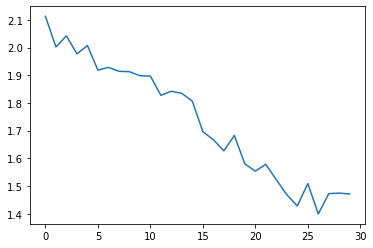

In [25]:
model1 = tf.keras.Sequential([
    tf.keras.layers.Embedding(1000, 16, input_length=100),
    tf.keras.layers.Conv1D(32, 3, activation='relu'),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dropout(0.6),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Set the training parameters
model1.compile(loss=tf.keras.losses.MeanAbsoluteError(), optimizer='adam')

# Print the model summary
history = model1.fit(feature_train,
                    label_train,
                    epochs=300,
                    # validation_data=(feature_test, label_test),
                    verbose=2,
                    callbacks=[callback])

plot_graphs(history, 'loss')

In [27]:
# score1 = model1.evaluate(feature_test, label_test)

pred = model1.predict(feature_train)
result = datas = {'pred':pred, 'true':label_train}
for i in range(len(label_train)):
    print('pred : {} label : {}'.format(round(pred[i][0]), label[i]))

1/1 [==============================] - 0s 212ms/step
pred : 1 label : 2
pred : 1 label : 3
pred : 1 label : 3
pred : 1 label : 1
pred : 1 label : 1
pred : 1 label : 2
pred : 1 label : 1
pred : 1 label : 3
pred : 1 label : 3


MEAN SQUARED ERROR

Epoch 1/300
3/3 - 3s - loss: 4.2490 - val_loss: 5.2067 - 3s/epoch - 968ms/step
Epoch 2/300
3/3 - 0s - loss: 3.3267 - val_loss: 4.1833 - 65ms/epoch - 22ms/step
Epoch 3/300
3/3 - 0s - loss: 2.4714 - val_loss: 3.1494 - 129ms/epoch - 43ms/step
Epoch 4/300
3/3 - 0s - loss: 1.7569 - val_loss: 2.1240 - 139ms/epoch - 46ms/step
Epoch 5/300
3/3 - 0s - loss: 1.2166 - val_loss: 1.3078 - 89ms/epoch - 30ms/step
Epoch 6/300
3/3 - 0s - loss: 0.7860 - val_loss: 0.9015 - 137ms/epoch - 46ms/step
Epoch 7/300
3/3 - 0s - loss: 0.9267 - val_loss: 0.7850 - 211ms/epoch - 70ms/step
Epoch 8/300
3/3 - 0s - loss: 1.0275 - val_loss: 0.7549 - 127ms/epoch - 42ms/step
Epoch 9/300
3/3 - 0s - loss: 0.9555 - val_loss: 0.8146 - 74ms/epoch - 25ms/step
Epoch 10/300
3/3 - 0s - loss: 0.6611 - val_loss: 0.9688 - 71ms/epoch - 24ms/step
Epoch 11/300
3/3 - 0s - loss: 0.6740 - val_loss: 1.1230 - 84ms/epoch - 28ms/step


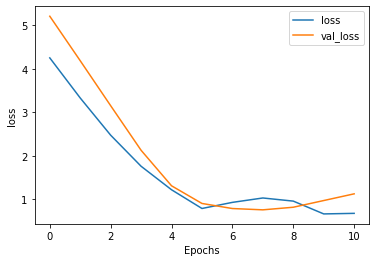

In [10]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Embedding(1000, 150, input_length=20),
    tf.keras.layers.Conv1D(256, 3, activation='relu'),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dropout(0.7),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Set the training parameters
model2.compile(loss=tf.keras.losses.MeanSquaredError(), optimizer='adam')

# Print the model summary
history = model2.fit(feature_train,
                    label_train,
                    epochs=300,
                    validation_data=(feature_test, label_test),
                    verbose=2,
                    callbacks=[callback])

plot_graphs(history, 'loss')

In [75]:
score2 = model2.evaluate(feature_test, label_test)

pred = model2.predict(feature_test)
result = datas = {'pred':pred, 'true':label_test}
for i in range(len(label_test)):
    print('pred : {} label : {}'.format(round(pred[i][0]), label[i]))

1/1 [==============================] - 0s 20ms/step
pred : 4 label : 5
pred : 3 label : 5
pred : 4 label : 6
pred : 3 label : 6
pred : 4 label : 4
pred : 3 label : 4
pred : 4 label : 3
pred : 4 label : 5
pred : 4 label : 4


SPARSE CATEGORICAL CROSSENTROPY 1

Epoch 1/300
3/3 - 3s - loss: 1.3833 - accuracy: 0.2353 - val_loss: 1.3711 - val_accuracy: 0.3333 - 3s/epoch - 1s/step
Epoch 2/300
3/3 - 0s - loss: 1.3677 - accuracy: 0.3882 - val_loss: 1.3486 - val_accuracy: 0.3333 - 73ms/epoch - 24ms/step
Epoch 3/300
3/3 - 0s - loss: 1.3503 - accuracy: 0.3529 - val_loss: 1.3282 - val_accuracy: 0.3333 - 169ms/epoch - 56ms/step
Epoch 4/300
3/3 - 0s - loss: 1.3338 - accuracy: 0.3647 - val_loss: 1.3081 - val_accuracy: 0.3333 - 83ms/epoch - 28ms/step
Epoch 5/300
3/3 - 0s - loss: 1.3178 - accuracy: 0.4118 - val_loss: 1.2887 - val_accuracy: 0.3333 - 112ms/epoch - 37ms/step
Epoch 6/300
3/3 - 0s - loss: 1.3032 - accuracy: 0.4000 - val_loss: 1.2711 - val_accuracy: 0.3333 - 62ms/epoch - 21ms/step
Epoch 7/300
3/3 - 0s - loss: 1.2791 - accuracy: 0.3882 - val_loss: 1.2523 - val_accuracy: 0.3333 - 72ms/epoch - 24ms/step
Epoch 8/300
3/3 - 0s - loss: 1.2563 - accuracy: 0.3882 - val_loss: 1.2347 - val_accuracy: 0.3333 - 57ms/epoch - 19ms/step
Epoch 9/300
3/3 - 0s - los

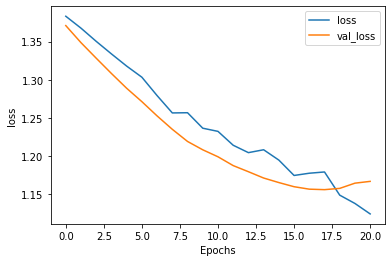

In [11]:
model3 = tf.keras.Sequential([
    tf.keras.layers.Embedding(1000, 21, input_length=20),
    tf.keras.layers.Conv1D(256, 3, activation='relu'),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dropout(0.7),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

# Set the training parameters
model3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer='adam', metrics=['accuracy'])

# Print the model summary
history = model3.fit(feature_train,
                    label_train,
                    epochs=300,
                    validation_data=(feature_test, label_test),
                    verbose=2,
                    callbacks=[callback])

plot_graphs(history, 'loss')

In [12]:
score3 = model3.evaluate(feature_test, label_test)

pred = model3.predict(feature_test)
result = datas = {'pred':pred, 'true':label_test}
for i in range(len(label_test)):
    print('pred : {} label : {}'.format(pred[i], label[i]))

1/1 [==============================] - 0s 128ms/step
pred : [0.04705585 0.26802382 0.40117615 0.28374416] label : 2
pred : [0.05067087 0.25654137 0.41648453 0.27630326] label : 2
pred : [0.06407151 0.27177423 0.3921111  0.27204317] label : 3
pred : [0.07162558 0.26579738 0.41193637 0.2506407 ] label : 3
pred : [0.04524508 0.29091594 0.3981126  0.2657264 ] label : 1
pred : [0.05227768 0.2479339  0.4222716  0.27751672] label : 1
pred : [0.04248435 0.2687499  0.38193765 0.30682814] label : 0
pred : [0.05625016 0.26269683 0.4090525  0.27200043] label : 2
pred : [0.06436344 0.28847355 0.36361256 0.28355044] label : 1


SPARSE CATEGORICAL CROSSENTROPY 2

Epoch 1/300
3/3 - 10s - loss: 1.9395 - accuracy: 0.3529 - val_loss: 1.9371 - val_accuracy: 0.3333 - 10s/epoch - 3s/step
Epoch 2/300
3/3 - 0s - loss: 1.9178 - accuracy: 0.3647 - val_loss: 1.9255 - val_accuracy: 0.3333 - 150ms/epoch - 50ms/step
Epoch 3/300
3/3 - 0s - loss: 1.8825 - accuracy: 0.3412 - val_loss: 1.9064 - val_accuracy: 0.3333 - 160ms/epoch - 53ms/step
Epoch 4/300
3/3 - 0s - loss: 1.8442 - accuracy: 0.3647 - val_loss: 1.8827 - val_accuracy: 0.3333 - 143ms/epoch - 48ms/step
Epoch 5/300
3/3 - 0s - loss: 1.7927 - accuracy: 0.3765 - val_loss: 1.8659 - val_accuracy: 0.3333 - 151ms/epoch - 50ms/step
Epoch 6/300
3/3 - 0s - loss: 1.7357 - accuracy: 0.3647 - val_loss: 1.8760 - val_accuracy: 0.3333 - 298ms/epoch - 99ms/step
Epoch 7/300
3/3 - 0s - loss: 1.6671 - accuracy: 0.4118 - val_loss: 1.8639 - val_accuracy: 0.3333 - 184ms/epoch - 61ms/step
Epoch 8/300
3/3 - 0s - loss: 1.6831 - accuracy: 0.4000 - val_loss: 1.7565 - val_accuracy: 0.3333 - 180ms/epoch - 60ms/step
Epoch 9/300
3/3 - 0

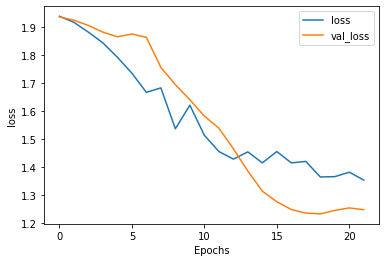

In [24]:
model4 = tf.keras.Sequential([
    tf.keras.layers.Embedding(1000, 16, input_length=50),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dropout(0.7),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(7, activation='softmax')
])

# Set the training parameters
model4.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer='adam', metrics=['accuracy'])

# Print the model summary
history = model4.fit(feature_train,
                    label_train,
                    epochs=300,
                    validation_data=(feature_test, label_test),
                    verbose=2,
                    callbacks=[callback])

plot_graphs(history, 'loss')

In [12]:
score4 = model4.evaluate(feature_test, label_test)

pred = model4.predict(feature_test)
result = datas = {'pred':pred, 'true':label_test}
for i in range(len(label_test)):
    print('pred : {} label : {}'.format(round(pred[i][0]), label[i]))

1/1 [==============================] - 2s 2s/step
pred : 0 label : 6
pred : 0 label : 7
pred : 0 label : 8
pred : 0 label : 8
pred : 0 label : 5
pred : 0 label : 4
pred : 0 label : 3
pred : 0 label : 7
pred : 0 label : 5


SPARSE CATEGORICAL CROSSENTROPY 3

Epoch 1/300
3/3 - 1s - loss: 2.4113 - accuracy: 0.0588 - val_loss: 2.4043 - val_accuracy: 0.1111 - 1s/epoch - 343ms/step
Epoch 2/300
3/3 - 0s - loss: 2.3995 - accuracy: 0.1176 - val_loss: 2.3994 - val_accuracy: 0.0000e+00 - 52ms/epoch - 17ms/step
Epoch 3/300
3/3 - 0s - loss: 2.3910 - accuracy: 0.1059 - val_loss: 2.3953 - val_accuracy: 0.0000e+00 - 54ms/epoch - 18ms/step
Epoch 4/300
3/3 - 0s - loss: 2.3828 - accuracy: 0.1882 - val_loss: 2.3906 - val_accuracy: 0.2222 - 47ms/epoch - 16ms/step
Epoch 5/300
3/3 - 0s - loss: 2.3767 - accuracy: 0.2471 - val_loss: 2.3871 - val_accuracy: 0.2222 - 48ms/epoch - 16ms/step
Epoch 6/300
3/3 - 0s - loss: 2.3715 - accuracy: 0.2471 - val_loss: 2.3842 - val_accuracy: 0.2222 - 49ms/epoch - 16ms/step
Epoch 7/300
3/3 - 0s - loss: 2.3660 - accuracy: 0.2471 - val_loss: 2.3814 - val_accuracy: 0.2222 - 50ms/epoch - 17ms/step
Epoch 8/300
3/3 - 0s - loss: 2.3600 - accuracy: 0.2471 - val_loss: 2.3784 - val_accuracy: 0.2222 - 41ms/epoch - 14ms/step
Epoch 9/300
3/3 -

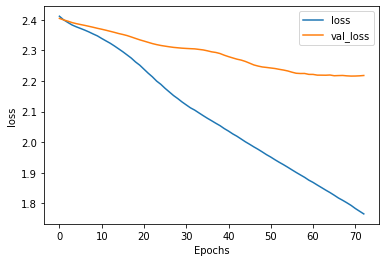

In [13]:
model5 = tf.keras.Sequential([
    tf.keras.layers.Embedding(1000, 64, input_length=70),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(11, activation='softmax')
])

# Set the training parameters
model5.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer='adam', metrics=['accuracy'])

# Print the model summary
history = model5.fit(feature_train,
                    label_train,
                    epochs=300,
                    validation_data=(feature_test, label_test),
                    verbose=2,
                    callbacks=[callback])

plot_graphs(history, 'loss')

In [14]:
score5 = model5.evaluate(feature_test, label_test)

pred = model5.predict(feature_test)
result = datas = {'pred':pred, 'true':label_test}
for i in range(len(label_test)):
    print('pred : {} label : {}'.format(round(pred[i][0]), label[i]))

1/1 [==============================] - 0s 61ms/step
pred : 0 label : 6
pred : 0 label : 7
pred : 0 label : 8
pred : 0 label : 8
pred : 0 label : 5
pred : 0 label : 4
pred : 0 label : 3
pred : 0 label : 7
pred : 0 label : 5


SKLEARN

In [32]:
X_train, X_test, y_train, y_test = train_test_split(df.loc[:, 'key'], df.loc[:, 'MD'], test_size=0.1, random_state=12)
vectorizer = TfidfVectorizer(ngram_range=(1,2))
# vectorizer = CountVectorizer(max_features=30000, ngram_range=(1,2))

vectorizer.fit_transform(df['key'])
train_data = vectorizer.transform(X_train)
test_data = vectorizer.transform(X_test)

LOGISTIC REGRESSION

In [33]:
lr = LogisticRegression(solver='lbfgs', random_state=0)
lr.fit(train_data, y_train)

pred = lr.predict(test_data)
lr_score = accuracy_score(y_test, pred)
y_test = y_test.reset_index(drop=True)

for i in range(len(pred)):
    print("Pred : {} True : {}".format(pred[i], y_test[i]))

print('\nModel score : {}'.format(lr_score))

print(classification_report(y_test, pred))

Pred : 1 True : 3

Model score : 0.0
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       0.0
           3       0.00      0.00      0.00       1.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



C:\Users\sakur\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sakur\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sakur\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

SGD REGRESSIONS

In [34]:
sgd = SGDClassifier(loss='hinge', penalty='l2',
                    alpha=0.0005, random_state=0,
                    max_iter=50, tol=None)

sgd.fit(train_data, y_train)

pred = sgd.predict(test_data)
sgd_score = accuracy_score(y_test, pred)
y_test = y_test.reset_index(drop=True)

for i in range(len(pred)):
    print("Pred : {} True : {}".format(pred[i], y_test[i]))

print('\nModel score : {}'.format(sgd_score))

print(classification_report(y_test, pred))

Pred : 1 True : 3

Model score : 0.0
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       0.0
           3       0.00      0.00      0.00       1.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



C:\Users\sakur\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sakur\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sakur\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

NAIVE BAYES

In [35]:
nb = MultinomialNB(alpha=0.001)
nb.fit(train_data, y_train)

pred = nb.predict(test_data)
nb_score = accuracy_score(y_test, pred)
y_test = y_test.reset_index(drop=True)

for i in range(len(pred)):
    print("Pred : {} True : {}".format(pred[i], y_test[i]))

print('\nModel score : {}'.format(nb_score))

print(classification_report(y_test, pred))

Pred : 3 True : 3

Model score : 1.0
              precision    recall  f1-score   support

           3       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



RANDOM FOREST

In [36]:
rf = RandomForestClassifier()
rf.fit(train_data, y_train)

pred = rf.predict(test_data)
rf_score = accuracy_score(y_test, pred)
y_test = y_test.reset_index(drop=True)

for i in range(len(pred)):
    print("Pred : {} True : {}".format(pred[i], y_test[i]))

print('\nModel score : {}'.format(rf_score))

print(classification_report(y_test, pred))

Pred : 3 True : 3

Model score : 1.0
              precision    recall  f1-score   support

           3       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



GRADIENT BOOSTING

In [37]:
gb = GradientBoostingClassifier()
gb.fit(train_data, y_train)

pred = gb.predict(test_data)
gb_score = accuracy_score(y_test, pred)
y_test = y_test.reset_index(drop=True)

for i in range(len(pred)):
    print("Pred : {} True : {}".format(pred[i], y_test[i]))

print('\nModel score : {}'.format(gb_score))

Pred : 3 True : 3

Model score : 1.0


DECISION TREE

In [38]:
dt = DecisionTreeClassifier(criterion='gini')
dt.fit(train_data, y_train)

pred = dt.predict(test_data)
dt_score = accuracy_score(y_test, pred)
y_test = y_test.reset_index(drop=True)

for i in range(len(pred)):
    print("Pred : {} True : {}".format(pred[i], y_test[i]))

print('\nModel score : {}'.format(dt_score))

Pred : 3 True : 3

Model score : 1.0


K NEAREST NEIGHBORS

In [39]:
knn = KNeighborsClassifier(8, weights='uniform')
knn.fit(train_data, y_train)

pred = knn.predict(test_data)
knn_score = accuracy_score(y_test, pred)
y_test = y_test.reset_index(drop=True)

for i in range(len(pred)):
    print("Pred : {} True : {}".format(pred[i], y_test[i]))

print('\nModel score : {}'.format(knn_score))

Pred : 1 True : 3

Model score : 0.0
